# Установка библиотек

In [4]:
import pandas as pd #для работы с таблицами

In [2]:
!pip install scipy

You should consider upgrading via the 'C:\Users\DOM\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install statsmodels

You should consider upgrading via the 'C:\Users\DOM\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


# Домашнее задание

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
 
 
Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.

## 1. Создание DataFrame по мидиям Санкт-Петербурга и Магадана

Информация по размерам раковины мидий, выращенных в разных местах.

In [5]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [6]:
max_len = max(map(len, [petersburg, magadan]))
pad_list = lambda x, n: x + [''] * (n - len(x))
data = pd.DataFrame({
    'petersburg': pad_list(petersburg, max_len),
    'magadan': pad_list(magadan, max_len)})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   petersburg  8 non-null      object 
 1   magadan     8 non-null      float64
dtypes: float64(1), object(1)
memory usage: 256.0+ bytes


## 2. Анализ и обработка DataFrame

### 2.1 Проверка типов данных

In [7]:
data['petersburg'] = data['petersburg'].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   petersburg  7 non-null      float64
 1   magadan     8 non-null      float64
dtypes: float64(2)
memory usage: 256.0 bytes


### 2.2 Анализ пропусков и их замена

<AxesSubplot: title={'center': 'Распределение пропусков в данных'}>

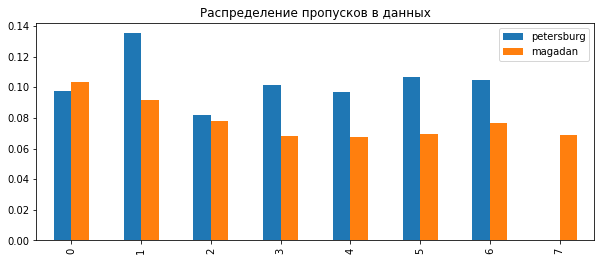

In [8]:
# проверка пропусков данных
data.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
)

In [9]:
# пропущенное значение заменяем на среднее, т.к. разброс данных небольшой
data['petersburg'] = data['petersburg'].fillna(data['petersburg'].mean())
data

,petersburg,magadan
0,0.097400,0.1033
1,0.135200,0.0915
2,0.081700,0.0781
3,0.101600,0.0685
4,0.096800,0.0677
5,0.106400,0.0697
6,0.105000,0.0764
7,0.103443,0.0689


## 3. Проверка данных на нормальность

In [10]:
# гипотезы
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'
# уровень значимости
alpha = 0.05

### Тест Шапиро-Уилка

In [11]:
from scipy.stats import shapiro

In [12]:
_, p = shapiro(data)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.100
Данные распределены нормально


### Тест Д’Агостино

In [14]:
from scipy.stats import normaltest

In [15]:
_, p = normaltest(data)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация 

if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.042
Данные распределены нормально


c:\Users\DOM\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Вывод.** В соответствии с данными тестов Шапиро-Уилка и Д'Агостино в полученном DataFrame данные распрелены нормально.

## 4. Корреляционный тест

Зависимая переменная (размер раковины мидии) является количественной, а группы происходят из разных совокупностей, соотвественно, для анализа средних значений размеров раковин мидий необходимо использовать мы используем независимый **T-тест**.

In [16]:
from scipy.stats import ttest_ind

In [17]:
# гипотезы
H0 = 'Нет значимой разницы между средним размером раковины мидий из Санкт-Петербурге и Магадана.'
Ha = 'Есть значимая разница между средним размером раковины мидий из Санкт-Петербурге и Магадана.'
# уровень значимости
alpha = 0.05

In [18]:
def t_test(data):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(data['petersburg'], data['magadan'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(data)


*** Результаты независимого T-теста ***
0.0 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий из Санкт-Петербурге и Магадана.


## 5. Проверка результатов корреляционного теста

In [19]:
# вычисление срдених значений размеров раковин мидий
mus_spb_avg = data['petersburg'].mean() # Санкт-Петербург
mus_mgn_avg = data['magadan'].mean() # Магадн

# определение разницы средних значений раковин мидий
if (mus_mgn_avg-mus_spb_avg) > 0:
    print (f"Средний размер мидий из Магадана на {round(((abs(mus_mgn_avg - mus_spb_avg))/((mus_mgn_avg + mus_spb_avg)/2)*100),2)} % меньше")
else:
    print (f"Средний размер мидий из Санкт-Петербурга на {round(((abs(mus_mgn_avg - mus_spb_avg))/((mus_mgn_avg + mus_spb_avg)/2)*100),2)} % больше")

Средний размер мидий из Санкт-Петербурга на 28.03 % больше


**Вывод.** Средний размер раковины мидии из Санкт-Петербурга превосходит средний размер раковины мидии Магадана на 28,03% (более чем 5 %), что соответсвует данным корреляционного теста, где гипотеза о наличии значимой разницы между средним размером раковины мидий из Санкт-Петербурге и Магадана (H0) отвергнута.